# Algo - TSP - Traveling Salesman Problem

[TSP](https://fr.wikipedia.org/wiki/Probl%C3%A8me_du_voyageur_de_commerce), Traveling Salesman Problem ou Problème du Voyageur de Commerce est un problème classique. Il s'agit de trouver le plus court chemin passant par des villes en supposant qu'il existe une route entre chaque paire de villes.

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [2]:
%matplotlib inline

## Enoncé

On part d'un ensemble de villes aléatoires.

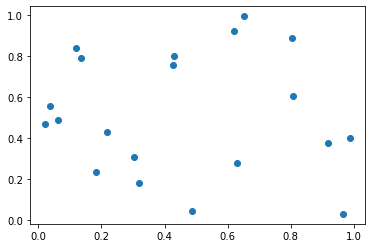

In [3]:
import numpy
import matplotlib.pyplot as plt

villes = numpy.random.rand(20, 2)
plt.plot(villes[:, 0], villes[:, 1], 'o');

### Q1 : choisir une permutation aléatoire des villes et calculer la distance du chemin qui les relie dans cet ordre


### Q2 : tirer deux villes aléatoirement, les inverser, garder la permutation si elle améliore la distance

### Q3 : choisir deux villes aléatoirement, permuter une des deux moitiés...

### Q4 : tester toutes les permutations possibles... je plaisante...

Choisir les deux villes les plus proches, les relier, recommencer, puis... vous trouverez bien quelque chose pour finir.

## Réponses